In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import special

In [3]:
######################################################################
#
# Functions to calculate integration points and weights for Gaussian
# quadrature
#
# x,w = gaussxw(N) returns integration points x and integration
#           weights w such that sum_i w[i]*f(x[i]) is the Nth-order
#           Gaussian approximation to the integral int_{-1}^1 f(x) dx
# x,w = gaussxwab(N,a,b) returns integration points and weights
#           mapped to the interval [a,b], so that sum_i w[i]*f(x[i])
#           is the Nth-order Gaussian approximation to the integral
#           int_a^b f(x) dx
#
# This code finds the zeros of the nth Legendre polynomial using
# Newton's method, starting from the approximation given in Abramowitz
# and Stegun 22.16.6.  The Legendre polynomial itself is evaluated
# using the recurrence relation given in Abramowitz and Stegun
# 22.7.10.  The function has been checked against other sources for
# values of N up to 1000.  It is compatible with version 2 and version
# 3 of Python.
#
# Written by Mark Newman <mejn@umich.edu>, June 4, 2011
# You may use, share, or modify this file freely
#
######################################################################

from numpy import ones,copy,cos,tan,pi,linspace

def gaussxw(N):

    # Initial approximation to roots of the Legendre polynomial
    a = linspace(3,4*N-1,N)/(4*N+2)
    x = cos(pi*a+1/(8*N*N*tan(a)))

    # Find roots using Newton's method
    epsilon = 1e-15
    delta = 1.0
    while delta>epsilon:
        p0 = ones(N,float)
        p1 = copy(x)
        for k in range(1,N):
            p0,p1 = p1,((2*k+1)*x*p1-k*p0)/(k+1)
        dp = (N+1)*(p0-x*p1)/(1-x*x)
        dx = p1/dp
        x -= dx
        delta = max(abs(dx))

    # Calculate the weights
    w = 2*(N+1)*(N+1)/(N*N*(1-x*x)*dp*dp)

    return x,w

def gaussxwab(N,a,b):
    x,w = gaussxw(N)
    return 0.5*(b-a)*x+0.5*(b+a),0.5*(b-a)*w

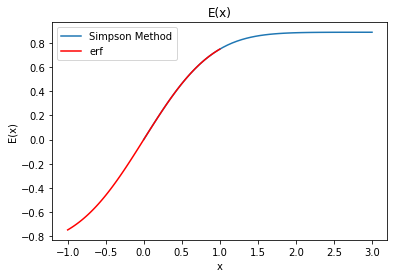

In [20]:
#Problem 5.3
#implementation of the error function erf to check your answer
def f(x):
    return np.exp(-x**2)

#I will integrate using Simpson's method and 1000 slices
def simpson( f, a, b, N ):
    h = (b - a) / N
    oddSum = 0
    for k in range(1, N, 2):
        oddSum += f(a + k*h)

    evenSum = 0
    for k in range(2, N, 2):
        evenSum += f(a + k*h)

    I = 1/3*h*(f(a) + f(b) + 4*oddSum + 2*evenSum)
    return I


def E(x):
    a = 0
    b = x
    N = 1000
    I = simpson(f, a, b, N)
    return I

# make a plot of E(x)
points = np.linspace(0, 3)
values = np.array(list(map(E, points)))

plt.plot(points, values, label = 'Simpson Method')
plt.xlabel("x")
plt.ylabel("E(x)")
plt.title("E(x)")
plt.plot(x, np.sqrt(np.pi)/2*special.erf(x), 'r', label = 'erf')
plt.legend()
plt.show()


/Users/chrisachuu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


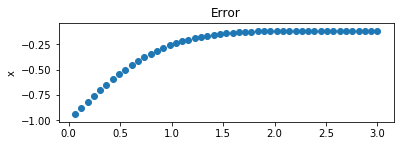

In [43]:
err_list = []

for i in range(len(values)):
    err = ((values[i])-((np.sqrt(np.pi)/2)*special.erf(i))/((np.sqrt(np.pi)/2)*special.erf(i)))
    err_list.append(err)
    
fig = plt.figure()

ax1 = fig.add_subplot(2,1,1)
ax1.scatter( points, err_list )
ax1.set_ylabel('Error')
ax1.set_ylabel('x')
ax1.title.set_text('Error')
plt.show()

/Users/chrisachuu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()
/Users/chrisachuu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()


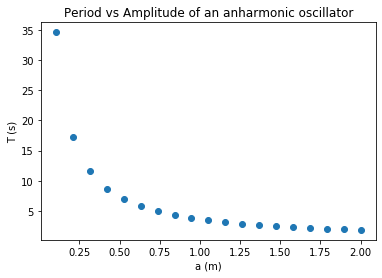

In [22]:
#Problem 5.10
m = 1 # mass
N = 20 # number of points for gaussian quadrature

#period function
def T(a):
    def f(x):
        def v(y):
            return y ** 4

        return 1 / np.sqrt(v(a) - v(x))

    x, w = gaussxwab(N, 0, a)
    integral = 0.0
    for k in range(N):
        integral += w[k] * f(x[k])

    return np.sqrt(8)*integral

# make a plot of T for a from 0 to 2
a = np.linspace(0, 2, 20)
periods = list(map(T, a))
plt.plot(a, periods, 'o')
plt.xlabel('a (m)')
plt.ylabel('T (s)')
plt.title('Period vs Amplitude of an anharmonic oscillator')
plt.show()


In [10]:
#Problem 5.12
def f(z):
    return (z / (1 - z) ) ** 3 / (np.exp(z / (1 - z)) - 1) * 1 / (1 - z) ** 2
# integrand is pretty smooth, so can use gaussian quadrature
N = 50 # points for Gaussian quadrature
x, w = gaussxwab(N, 0, 1)
integral = 0.0
for k in range(N):
    integral += w[k] * f(x[k])
print(integral)

6.493939400514872


In [57]:
import scipy.constants
k = scipy.constants.k #boltzmann constant
c = scipy.constants.c #speed of light
h = scipy.constants.hbar #hbar
A = (pow(k,4)/((4*pow(np.pi,2)*pow(c,2)*pow(h,3)))*integral*(375**4))

In [64]:
T = 375
ans = A/T**4
print("my answer: ", ans)
exact = scipy.constants.sigma
print("exact answer: ", exact)
err = (ans-exact)/(exact)
print("error: ", err)

my answer:  5.6703668145534974e-08
exact answer:  5.670367e-08
error:  -3.27044973121104e-08
